In [241]:
%matplotlib inline
import matplotlib.pylab as plt
import mapalign
from mapalign import embed
import numpy as np
import scipy
from scipy.io import loadmat
from sklearn.metrics import pairwise_distances

In [249]:
data = loadmat('PigeonMatrix.mat')
mat = np.concatenate((data['matrix'], data['matrix'])).T

aff = 1 - pairwise_distances(mat, metric = 'cosine')
idx = np.where(np.sum(mat, axis=1) > 2)[0]

emb = embed.compute_diffusion_map(aff[idx,:][:,idx])

labels = [i[0].encode("utf-8") for i in data['labels'][0]]
labels = [labels[i] for i in idx]

IOError: [Errno 2] No such file or directory: 'PigeonMatrix.mat'

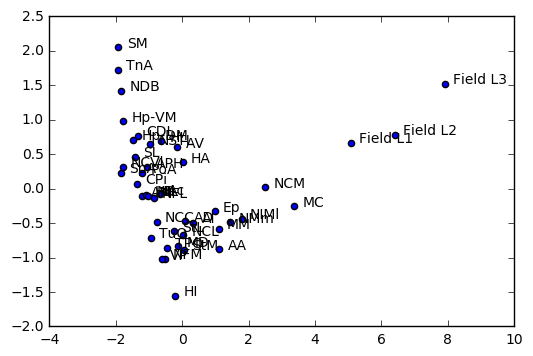

In [246]:
plt.scatter(emb[:,0], emb[:,1])
for label, x, y in zip(labels, emb[:,0], emb[:,1]):
    plt.annotate(label, xy=(x+0.25, y))
plt.show()

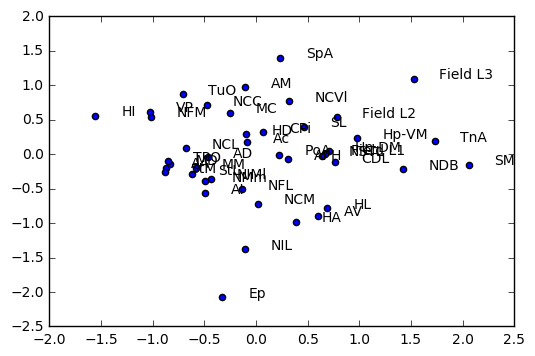

In [247]:
plt.scatter(emb[:,1], emb[:,2])
for label, x, y in zip(labels, emb[:,1], emb[:,2]):
    plt.annotate(label, xy=(x+0.25, y))
plt.show()

In [248]:
import xml.etree.ElementTree as ET
from colormap import rgb2hex
import pandas as pd
import matplotlib as plt

path_style = "stroke:#000000;stroke-width:0;stroke-opacity:0;fill-opacity:1;fill:"
SVG_NS = "http://www.w3.org/2000/svg"

tree = ET.parse('pigeon.svg')
root = tree.getroot()

spL = labels

cmap = plt.cm.get_cmap('pink')

for e in range(3):
    
    print e
    
    #order1 = np.array([np.float(i) for i in np.argsort(emb[:,e].copy())])
    order1 = emb[:,e].copy()

    normalized = (order1-min(order1))/(max(order1)-min(order1))
    col = cmap(normalized)

    matching = []
    for sRoot in root:
        for node in sRoot:
            if 'id' in node.keys():
                #print node.attrib['id'].replace('_', ' ').replace(' 1', '')

                matching = [n for n, s in enumerate(spL) if
                    node.attrib['id'].replace('_', ' ') == s]
                #print str(node.attrib['id'].replace('_', ' ').replace(' 1', ''))

                if len(matching) > 0:
                    a = tuple(list(col[matching[0]]))
                    node.attrib['style'] = path_style + rgb2hex(a[0],a[1],a[2],a[3]) + ';'
                    node.attrib['fill'] = ""
                else:
                    node.attrib['style'] = path_style + rgb2hex(0.0,0.0,0.0,0.0) + ';'
                    node.attrib['fill'] = ""
                    print node.attrib['id'].replace('_', ' ')

    tree.write('pigeon_results_%i.svg' % e)

0
CPP
AIvm
MVL
IHA
Bas
Ee
Ei 
GP
BO
1
CPP
AIvm
MVL
IHA
Bas
Ee
Ei 
GP
BO
2
CPP
AIvm
MVL
IHA
Bas
Ee
Ei 
GP
BO
